In [148]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
import matplotlib.colors as mcolors
import matplotlib.ticker as ticker
palette = list(mcolors.TABLEAU_COLORS.keys())
%matplotlib inline

In [149]:
#sns.set_theme(style="ticks", palette="pastel")
sns.set_theme(style="ticks", palette="muted")
sns.set_context("talk")

In [150]:
AAcode = {
    'Alanine': 'Ala',
    'Arginine': 'Arg',
    'Asparagine': 'Asn',
    'Aspartate': 'Asp',
    'Glutamate': 'Glu',
    'Glutamine': 'Gln',
    'Glycine': 'Gly',
    'Isoleucine': 'Ile',
    'Leucine': 'Leu',
    'Lysine': 'Lys',
    'Methionine': 'Met',
    'Phenylalanine': 'Phe',
    'Proline': 'Pro',
    'Serine': 'Ser',
    'Threonine': 'Thr',
    'Tryptophan': 'Trp',
    'Tyrosine': 'Tyr',
    'Valine': 'Val'
}

In [151]:
df = pd.read_excel('influx.xlsx')

In [152]:
df

,Unnamed: 0,Samples_name,Alanine pos,Arginine pos,Asparagine pos,Aspartate neg,Glutamate neg,Glutamine pos,Glycine neg,Isoleucine pos,Leucine pos,Lysine pos,Methionine pos,Phenylalanine pos,Proline pos,Serine neg,Threonine neg,Tryptophan pos,Tyrosine pos,Valine pos
0,0,AF1,-inf,-inf,inf,-inf,NaN,-inf,inf,-inf,-inf,inf,-inf,-inf,NaN,inf,-inf,-inf,-inf,-inf
1,1,AF2,inf,inf,-inf,inf,NaN,inf,-inf,inf,inf,-inf,inf,inf,NaN,-inf,inf,inf,inf,inf
2,2,AF3,-0.231885,1.486352,-0.914361,4.241091,-7.387576,30.805739,0.467457,3.122836,3.398752,1.836688,0.581675,1.084094,-0.299336,3.745368,1.985481,0.309932,1.133651,2.692885
3,3,AF4,-0.288329,1.441158,-1.247871,4.601611,-8.246565,31.992951,-0.081917,3.261240,3.664018,2.105417,0.598870,1.052207,-0.336374,3.969409,2.019293,0.296474,0.817991,2.578928
4,4,AF5,-0.265694,1.945098,-0.994957,4.841581,-7.940382,35.951827,0.672795,2.511717,5.668190,2.715456,0.797660,1.388293,-0.324069,4.078427,3.056043,0.358420,1.310337,3.134047
5,5,AF6,-0.296989,1.851992,-0.993173,4.868082,-7.777196,35.189383,0.347509,3.446391,3.609576,2.879848,0.713595,1.234882,-0.315980,4.133065,2.480552,0.329712,1.360567,2.740514
6,6,AF7,-0.246400,1.874578,-0.974513,5.008025,-7.482871,34.488582,0.640250,2.836573,5.517394,2.927438,0.763195,1.402447,-0.300468,4.443762,2.525645,0.423718,1.402764,3.196791
7,7,AF8,-0.317173,1.639292,-1.132687,4.952783,-8.841801,36.089951,0.214532,2.074483,5.559161,2.424098,0.650738,1.209858,-0.349237,4.167004,2.354393,0.317570,1.215106,2.602967
8,8,AF9,-0.319100,1.198410,-1.078579,4.084392,-5.683267,24.851151,0.174117,1.797230,3.477135,1.801452,0.499700,0.807304,-0.263861,3.827497,1.225002,0.252920,0.858658,1.682629
9,9,AF10,-0.322696,1.574386,-1.144198,4.822041,-6.063331,30.257589,0.394139,2.633374,4.384960,2.514221,0.700533,1.234515,-0.271972,4.110286,2.288322,0.340934,1.265994,2.860842


In [153]:
meta_df = pd.read_csv('Asp-uptake-flux_meta.csv', sep=',')

In [154]:
df_time = meta_df.merge(df, left_on='Sample_name', right_on='Samples_name')

cols = np.concatenate([df_time.columns.values[4:5], df_time.columns.values[7:]])
rows = df_time['Time'] > 0
df_time = df_time.loc[rows, cols]

new_colname = list()
for cn in df_time.columns:
    if 'pos' in cn or 'neg' in cn:
        new_colname.append(cn[:-4])
    else:
        new_colname.append(cn)
df_time.columns = new_colname
df_time = df_time.rename(columns=AAcode)

In [155]:
df_mean = df_time.groupby(['Time']).mean().reset_index()

In [156]:
col_sele = [c for c in df_mean.columns if c != 'Time']
#sort_mask = df_mean.loc[0, col_sele].abs().sort_values(ascending=False).index.values
sort_mask = df_mean.loc[0, col_sele].sort_values(ascending=False).index.values
sort_mask = np.concatenate([['Time'], sort_mask])

df_time_sort = df_time.loc[:, sort_mask]

In [157]:
df_time_sort

,Time,Gln,Asp,Leu,Ser,Ile,Val,Lys,Thr,Arg,Phe,Tyr,Met,Gly,Trp,Ala,Pro,Asn,Glu
2,23,30.805739,4.241091,3.398752,3.745368,3.122836,2.692885,1.836688,1.985481,1.486352,1.084094,1.133651,0.581675,0.467457,0.309932,-0.231885,-0.299336,-0.914361,-7.387576
3,23,31.992951,4.601611,3.664018,3.969409,3.261240,2.578928,2.105417,2.019293,1.441158,1.052207,0.817991,0.598870,-0.081917,0.296474,-0.288329,-0.336374,-1.247871,-8.246565
4,23,35.951827,4.841581,5.668190,4.078427,2.511717,3.134047,2.715456,3.056043,1.945098,1.388293,1.310337,0.797660,0.672795,0.358420,-0.265694,-0.324069,-0.994957,-7.940382
5,23,35.189383,4.868082,3.609576,4.133065,3.446391,2.740514,2.879848,2.480552,1.851992,1.234882,1.360567,0.713595,0.347509,0.329712,-0.296989,-0.315980,-0.993173,-7.777196
6,23,34.488582,5.008025,5.517394,4.443762,2.836573,3.196791,2.927438,2.525645,1.874578,1.402447,1.402764,0.763195,0.640250,0.423718,-0.246400,-0.300468,-0.974513,-7.482871
7,23,36.089951,4.952783,5.559161,4.167004,2.074483,2.602967,2.424098,2.354393,1.639292,1.209858,1.215106,0.650738,0.214532,0.317570,-0.317173,-0.349237,-1.132687,-8.841801
8,31,24.851151,4.084392,3.477135,3.827497,1.797230,1.682629,1.801452,1.225002,1.198410,0.807304,0.858658,0.499700,0.174117,0.252920,-0.319100,-0.263861,-1.078579,-5.683267
9,31,30.257589,4.822041,4.384960,4.110286,2.633374,2.860842,2.514221,2.288322,1.574386,1.234515,1.265994,0.700533,0.394139,0.340934,-0.322696,-0.271972,-1.144198,-6.063331
10,31,28.171587,4.449314,3.143745,3.815243,2.621547,1.982897,1.909910,1.619045,1.427308,0.932463,0.963449,0.595193,0.157271,0.269828,-0.310493,-0.276844,-1.097489,-6.293824
11,31,30.815637,4.907184,4.827712,4.273614,2.738020,2.838067,2.881653,2.515040,1.757088,1.360847,1.332652,0.763141,0.770998,0.389200,-0.285672,-0.265980,-1.104426,-5.608176


In [158]:
df_melt = df_time_sort.melt(id_vars=['Time'], var_name='Amino acid', value_name='Flux')

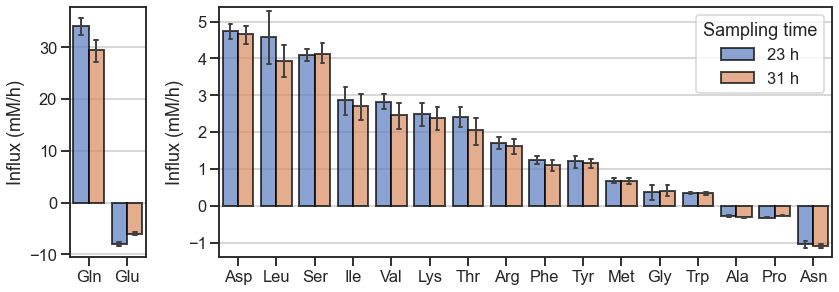

In [165]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4.4), gridspec_kw={'width_ratios': [1, 8]})

mask = df_melt['Amino acid'].isin(['Gln', 'Glu'])
g1 = sns.barplot(ax=ax1, x="Amino acid", y="Flux", hue="Time", data=df_melt[mask], capsize=.1, errwidth=2, edgecolor='black', linewidth=2, alpha=0.7)
g1.grid(True, axis='y')
#g1.set_yscale('log')
g1.set_ylabel('Influx (mM/h)');
g1.set_xlabel('');
g1.legend_.remove()
g1.set_xticklabels(g1.get_xticklabels(), rotation=0)


g2 = sns.barplot(ax=ax2, x="Amino acid", y="Flux", hue="Time", data=df_melt[~mask], capsize=.1, errwidth=2, edgecolor='black', linewidth=2, alpha=0.7)
g2.grid(True, axis='y')
#g2.set_yscale('log')
g2.set_ylabel('Influx (mM/h)');
g2.set_xlabel('');
g2.set_xticklabels(g2.get_xticklabels(), rotation=0);
g2.set_ylim([-1.4, 5.4])
g2.yaxis.set_major_locator(ticker.MultipleLocator(1))

old_legend = g2.legend_
handles = old_legend.legendHandles
labels = ['23 h', '31 h']
title = 'Sampling time'
g2.legend(handles, labels, title=title);



plt.tight_layout()
fig.savefig('influx.pdf')